# Zillow Regression Project

## Goals

* Find drivers for housing price on the Zillow 2017 dataset.
* Explore location based analysis.
* Construct a ML classification model that accurately predicts customer churn.

## Imports

In [1]:
import wrangle
import evaluate
import model
import viz
import module_test
import all_maps

## Acquire, Clean, and Split

In [2]:
# import and clean zillow data
df = wrangle.get_zillow_mvp()
wrangle.drop_zill_mvp(df)
# split data 
train,val,test = wrangle.train_val_test(df)
X_train, y_train, X_val, y_val = wrangle.X_y_split(train,val,'value')

### Data Snapshot

| Feature | Description                                                      |
|---------|------------------------------------------------------------------|
| bath    | Numeric. The number of bathrooms in the house.                   |
| bed     | Numeric. The number of bedrooms in the house.                    |
| sqft    | Numeric. The total square footage of the finished living area.   |
| value   | Numeric. The current estimated market value of the house.        |


In [3]:
# show train df
train.head(1)

,bath,bed,sqft,value
45431,2.0,3.0,1989.0,650145.0


In [4]:
# show X_train df 
X_train.head(1)

,bath,bed,sqft
45431,2.0,3.0,1989.0


## Exploratory Data Analysis

Exploring and visualizing the data to gain insight and spur more quesions about the dataset.

In [5]:
# assigning catagorical and continuous variables
cat = ['bath','bed']
cont = ['sqft','value']

### All catagorical values compared to all continuous ones

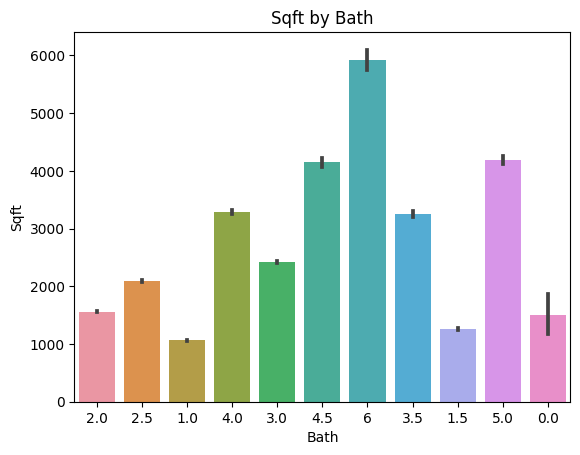

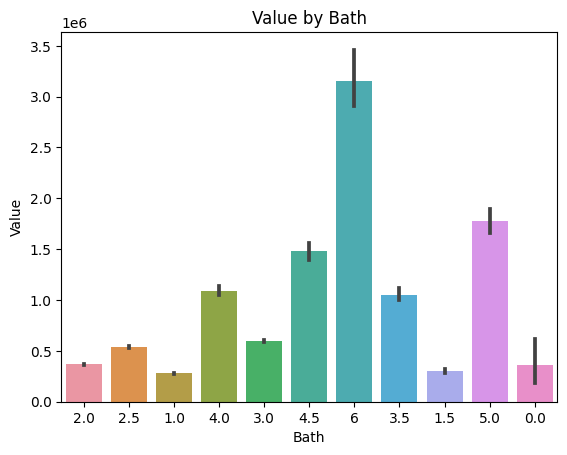

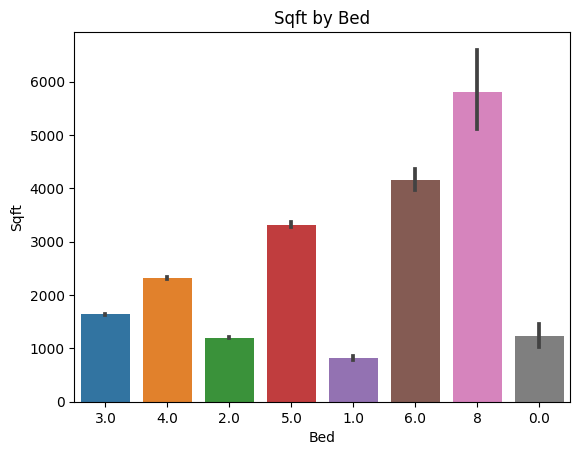

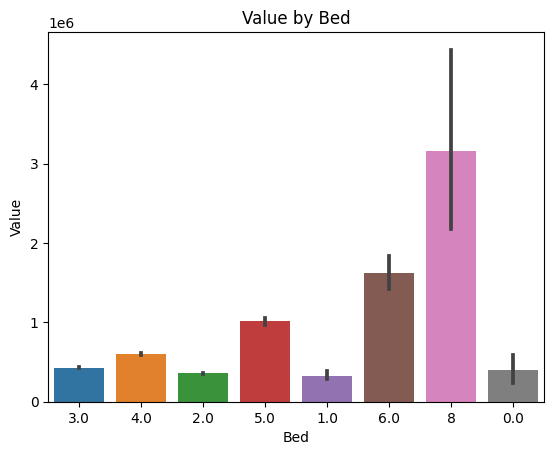

In [6]:
# exploratory plots
viz.plot_categorical_and_continuous_vars(train, cat,cont)

### Distribution plots

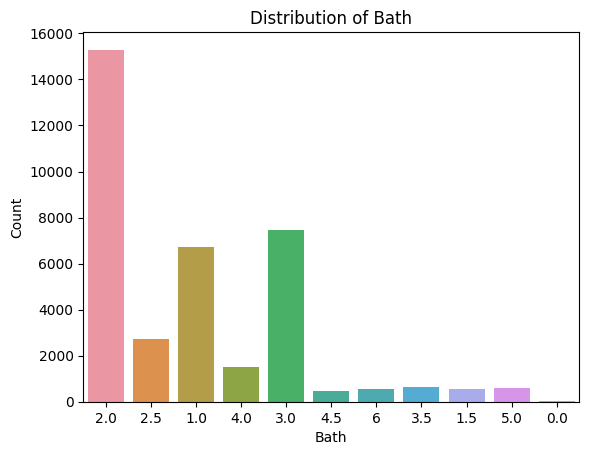

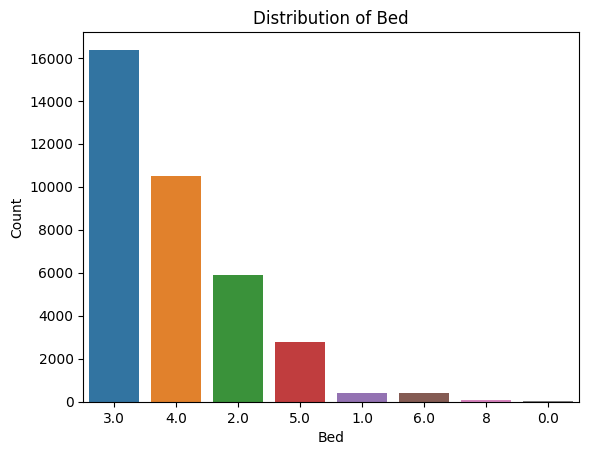

In [7]:
# distribution plots
viz.count_plots(train,cat)

### Explore Summary

There appear to be a lot of suprising observations by displaying the data like this. 

At a glance the distribution of price to beds and price to baths does not follow as clean a correaltion that one would expect. 

It bellies the fact that perhaps there are other factors, that effect price even more. 

And that some of the different size of the homes have these different factors. Perhaps two bedroom homes are only built in a certain part of town?

## Statistical Coorleation Tests

H_0 bath has no effect on value
H_a bath has an effect on value


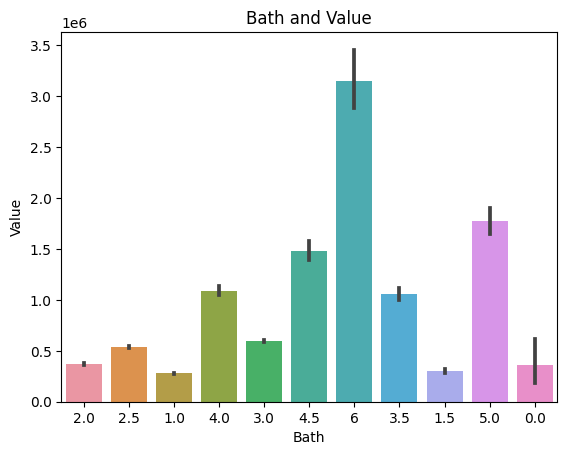

Reject the null hypothesis: bath has an effect on value. (p-value: 1.1599e-115)


H_0 bed has no effect on value
H_a bed has an effect on value


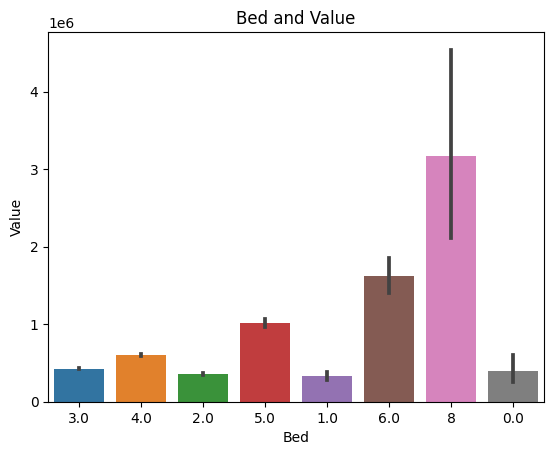

Reject the null hypothesis: bed has an effect on value. (p-value: 5.9587e-144)




In [8]:
# continuos catagorical tests
viz.ttest_viz(X_train,y_train,cat)

### We rejected both of our hypthoses TTests. Both number of beds and number of baths affect price.

H_0 sqft has no effect on value
H_a sqft has an effect on value


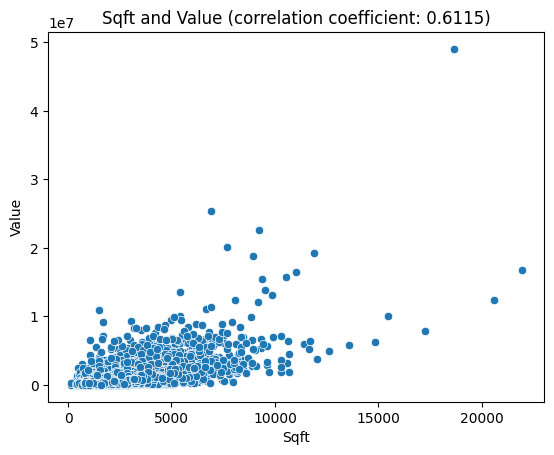

Reject the null hypothesis: sqft has an effect on value.




In [9]:
viz.pearsonr_viz(X_train,y_train)

### Sqft also has an effect on Value

### Exploration Summary 

All three values features have an effect on churn.

## Modeling

For modeling we will be scaling all of our data off of our train data.

In [10]:
# Scaled Data
X_train, x_val = model.scale_train_val(X_train,X_val)

### We are determining a baseline and comparing it to our best model.

In [11]:
# baseline
base_train , base_val = evaluate.mean_or_median_baseline(y_train,y_val)

mean


In [12]:
# Best model
evaluate.polynomial_regression_model(X_train, y_train, X_val, y_val)

,sse,ess,tss,mse,rmse,r2,dataset
0,1.158675e+16,9.865425e+15,2.145217e+16,3.168721e+11,562913.959425,0.459880,train
0,2.382229e+15,1.773141e+15,4.155370e+15,3.040108e+11,551371.779807,0.421084,val


### Our best model a Polynomial Regression model has an rmse of 562913.959425 and r2 of 0.459880

## Maps

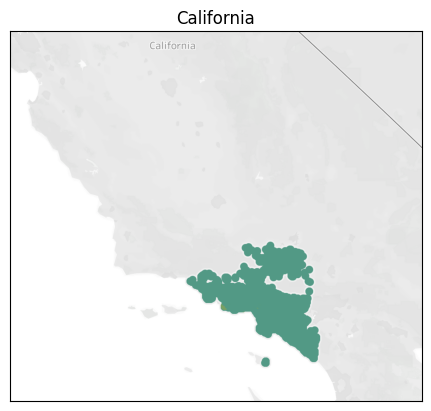

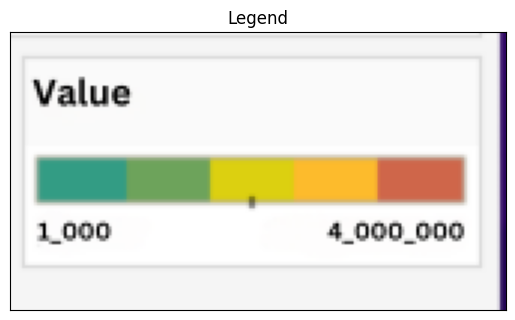

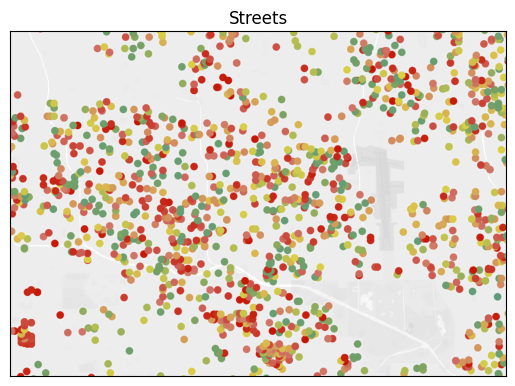

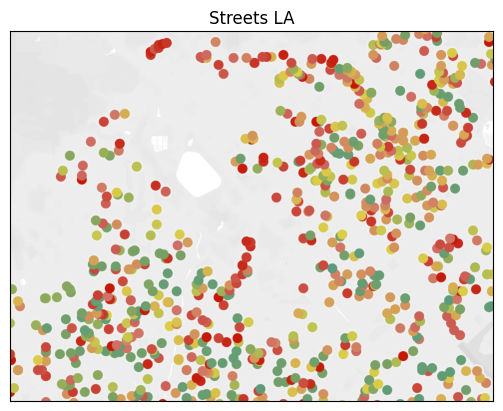

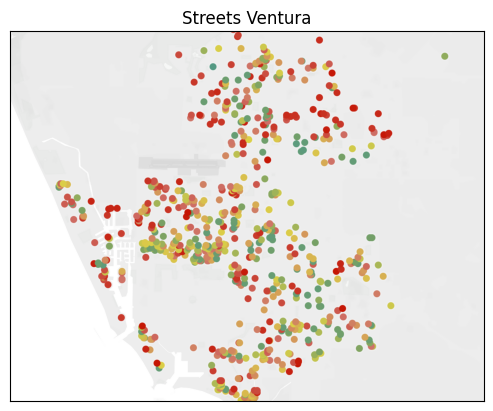

In [13]:
# tableau map images
all_maps.zil_map_img()

There is a stong correlation between locations and property price. Would be possible to run a classification model to make a feature for the regression model. 

The feature could take the distance from a couple points to stand in for location.

Could also progromatically make a feature by measuring distance from three points on different sites outsied the city for triangulation.

A single city center would not suffice because it would not be able to express the charachteristics of the clusters identified.

## Takeaways and Conclusion

- All elements of the MVP features effect value.
- Our model can predect the value of any house with an RSME of 562,913.96

## Recommendations and Next Steps

- We should focus on size, number of baths and number of bedrooms to predict price.
- I would like to get into the location data plot the lat longs
- Next would be to fine tune models by going through hyperparameters
- Limit data and train models on different location and price catagories